In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [29]:
df = pd.read_csv('wine.csv')
isnull = df.columns[df.isnull().any()].tolist()

In [30]:
def setGrade(q):
    if q>6:
        return 'good'
    else:
        return 'bad'
df['grade'] = df['quality'].apply(setGrade)

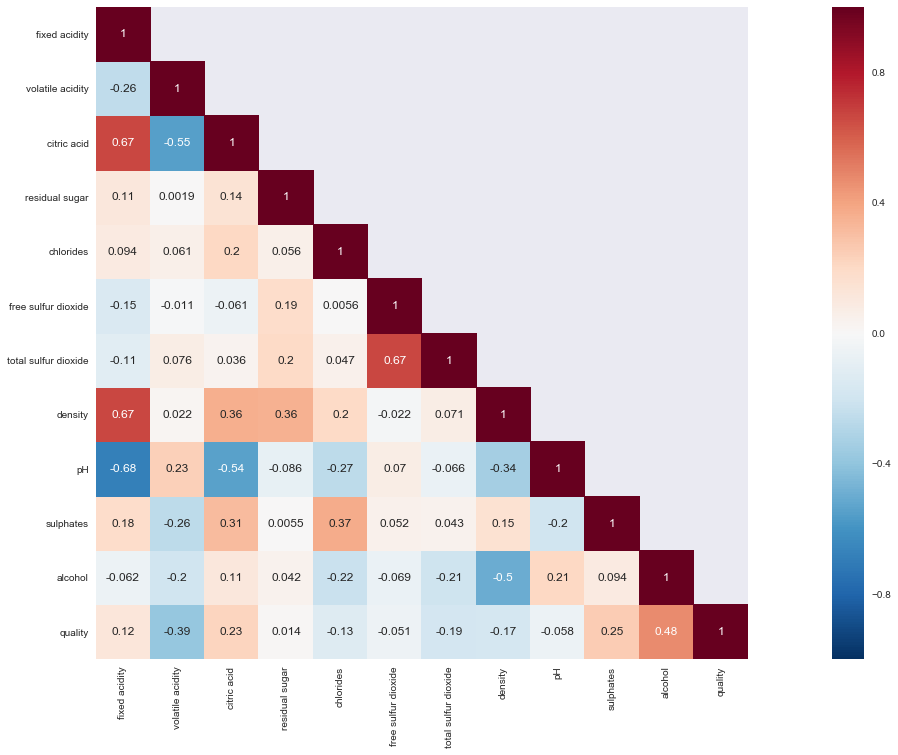

Best model made by Ming Shen


In [31]:
def showCorrelation():
    cor_mat = df.corr()
    mask = np.array(cor_mat)
    mask[np.tril_indices_from(mask)] = False
    fig = plt.gcf()
    fig.set_size_inches(30, 12)
    sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)
    plt.show()

showCorrelation()
print("Best model made by Ming Shen")
#columns with maximum correlatiion -> alcohol, volatile acid,

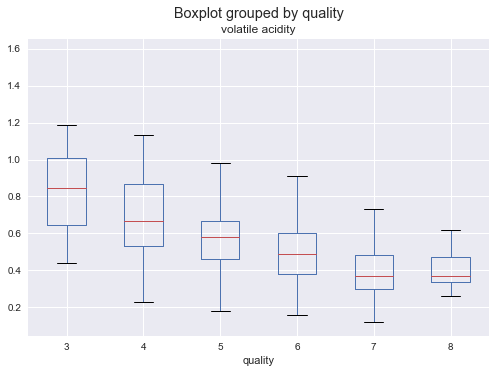

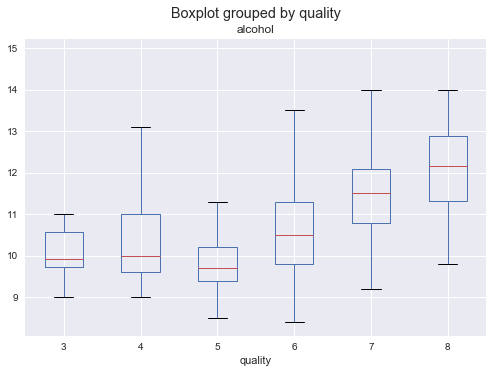

Best model made by Ming Shen


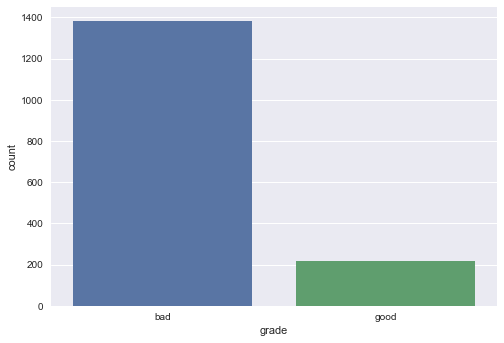

In [32]:
def showBoxPlots(col1,col2):
    df.boxplot(column=col1, by=col2)
    plt.show()

#negative coorelation. indicates that the quality decreases with increased volatile acidit
showBoxPlots('volatile acidity','quality')

# positive coorelation. indicates that quality increases with increase in alcohol content
showBoxPlots('alcohol','quality')
print("Best model made by Ming Shen")
sns.countplot(df['grade'])
plt.show()

In [33]:
#BUILDING MODELS

x = df.drop(['quality','grade'],axis=1)
y = df['grade']
print('------------------------')
print(isinstance(x,pd.DataFrame))
print(isinstance(y,pd.DataFrame))

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=10)

models = [logreg, knn , rf]
model_names = ['LogisticRegression','KNearestNeighbors', 'RandomForestClassifier']
accuracy_scores = []
d = {}


------------------------
True
False


In [34]:
for model in range(len(models)):
    mod = models[model]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, pred)*100 )
    print('connfusion matrix of '+model_names[model])
    print(confusion_matrix(y_test,pred))
    print("Best model made by Ming Shen")
    print("classification report of " + model_names[model])
    print(classification_report(y_test,pred))


connfusion matrix of LogisticRegression
[[401  12]
 [ 47  20]]
Best model made by Ming Shen
classification report of LogisticRegression
             precision    recall  f1-score   support

        bad       0.90      0.97      0.93       413
       good       0.62      0.30      0.40        67

avg / total       0.86      0.88      0.86       480

connfusion matrix of KNearestNeighbors
[[390  23]
 [ 39  28]]
Best model made by Ming Shen
classification report of KNearestNeighbors
             precision    recall  f1-score   support

        bad       0.91      0.94      0.93       413
       good       0.55      0.42      0.47        67

avg / total       0.86      0.87      0.86       480

connfusion matrix of RandomForestClassifier
[[397  16]
 [ 41  26]]
Best model made by Ming Shen
classification report of RandomForestClassifier
             precision    recall  f1-score   support

        bad       0.91      0.96      0.93       413
       good       0.62      0.39      0.48       

In [35]:
d = {'Modelling Algo': model_names, 'Accuracy': accuracy_scores}
print(d)

{'Modelling Algo': ['LogisticRegression', 'KNearestNeighbors', 'RandomForestClassifier'], 'Accuracy': [87.708333333333329, 87.083333333333329, 88.125]}


In [36]:
#----CROSS VALIDATION ON ALL MODELS--------

#knn

kscore = cross_val_score(knn,x,y,cv=8).mean()
print("knn accuracy after cross validation = " + str(kscore*100))

#randomforest

rfscore = cross_val_score(rf,x,y,cv=8).mean()
print("Random Forest accuracy after cross validation = " + str(rfscore*100))

#logistic

logregscore = cross_val_score(logreg,x,y,cv=8).mean()
print("Logistic accuracy after cross validation = " + str(logregscore*100))


knn accuracy after cross validation = 85.053621653
Random Forest accuracy after cross validation = 87.4336405285
Logistic accuracy after cross validation = 87.4923716843


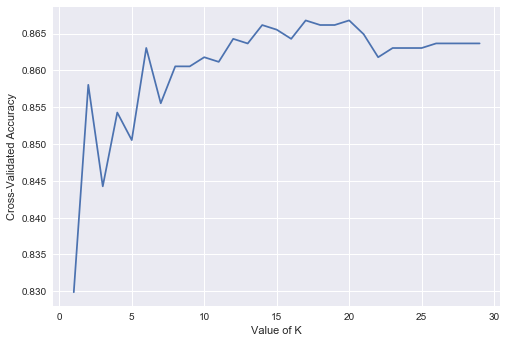

Best value of K in K neighbors is {'n_neighbors': 16}
Best Accuracy of the model when k is {'n_neighbors': 16} is 0.865540963102
Best model made by Ming Shen
Best value of C in Logistic Regression is {'C': 3.7275937203149381}
Best Accuracy of the model when C is {'C': 3.7275937203149381} is 0.872420262664


In [37]:
#------------HYPERPARAMATER TUNING-----------

#Finding the optimal value for k in knn

k_scores=[]
k_range = range(1,30)
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    k_scores.append(cross_val_score(knn,x,y,cv=8).mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

param_grid = {'n_neighbors': np.arange(1,30)}
knn_cv= GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(x,y)
print("Best value of K in K neighbors is " + str(knn_cv.best_params_))
print("Best Accuracy of the model when k is " + str(knn_cv.best_params_)+ " is " + str(knn_cv.best_score_))

# Finding the optimal value of C in Logistic using gridsearch

c_space = np.logspace(-5,8,15)
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(x,y)
print("Best model made by Ming Shen")
print('Best value of C in Logistic Regression is ' + str(logreg_cv.best_params_))
print("Best Accuracy of the model when C is " + str(logreg_cv.best_params_)+ " is " + str(logreg_cv.best_score_))